In [41]:
from cpymad.madx import Madx
import numpy as np
import sys
import matplotlib.pyplot as plt 

# package to import files from Gitlab
import requests

# Setting up the MAD-X environment

The MAD-X input files can be either directly loaded from Gitlab or from the EOS optics repository. 

In [42]:
madx = Madx()

useEOS = True

if useEOS:
    # Loading files from EOS
    # call sequence file and eventually additional tools
    madx.call('/eos/project/a/acc-models/public/ad/ad.seq')
    #   Apertures:
    madx.call('/eos/project/a/acc-models/public/ad/ad.dbx')
    #   Split elements to allow inserting BPMs:
    madx.call('/eos/project/a/acc-models/public/ad/tools/minimum_split_and_add_BPMs.madx')
    #   Split elements to allow inserting sextupolar corrections:
    madx.call('/eos/project/a/acc-models/public/ad/tools/additional_split.madx')
    # call strenghts for a given scenario
    madx.call('/eos/project/a/acc-models/public/ad/scenarios/highenergy/highenergy.str')
else:
    # Loading files from Gitlab
    # create sequence 
    aux_sequence = requests.get('https://gitlab.cern.ch/acc-models/acc-models-ad/raw/master/ad.seq')
    madx.input(aux_sequence.text)
    # split it to add BPMs 
    aux_add_BPMs = requests.get('https://gitlab.cern.ch/acc-models/acc-models-ad/raw/master/tools/minimum_split_and_add_BPMs.madx')
    madx.input(aux_add_BPMs.text)
    # ...
    aux_strength = requests.get('https://gitlab.cern.ch/acc-models/acc-models-ad/raw/master/scenarios/highenergy/highenergy.str')
    madx.input(aux_strength.text)
    


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.05.11 09:59:50      +
  ++++++++++++++++++++++++++++++++++++++++++++
/* *************************************************************

 * Official sequence of AD based on previous files.

 * It first defines each element type by type

 * 

 ************************************************************* */





! Imported with minor modifications from Pavel:

!

! - removed call of /afs/cern.ch/user/b/beloshit/public/ad/madx/AD_markers_imitating_quad:

!    -> This file creates new elements: QDN13.E:SBEND and QDN13.S:MARKER which are not used anywere.

! - merged with /afs/cern.ch/user/b/beloshit/public/ad/madx/AD_PUs

!    -> This file contains the monitors definition. It has to be called from "master" madx file

! - corrected a typo in RFCAVITY for bunch rotation definition  

! Second part of AD_simple.seq from Pavel

!

! - contains only splitting of quads and add of BPMs in the middle

!

! Davide April 25th 2019

!



!!!---------------------BEFORE BPMs INSTALLATION ONE HAS TO CUT CERTAIN QUADs in PARTS---------------------

!!!-------------------------THEN INSIDE of THEM PUs WILL BE PLACED-----------------------------------





DR.QFN.04.A: QFN.A;

DR.QFN.04.B: QFN.BC;

DR.QFN.04.H: QFN.H2;

SEQEDIT,SEQUENCE=AD;

REMOVE,  ELEMENT=DR.QFN.04;

INSTALL, ELEMENT=DR.QFN.04.A,   at = 9.8 - 0.7321/2 + 0.00605/2;

INSTALL, ELEMENT=DR.QFN.04.B,   at = 9.8 - 0.36/2;

INSTALL, ELEMENT=DR.QFN.04.H,   at = 9.8 + 0.7321/4;

ENDEDIT;

++++++ info: seqedit - number of elements installed:  3
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    1
++++++ info: seqedit - number of elements replaced:   0


DR.QDN.05.H: QDN.H1;

DR.QDN.05.C: QDN.BC;

DR.QDN.05.D: QDN.D;

SEQEDIT,SEQUENCE=AD;

REMOVE,  ELEMENT=DR.QDN.0

! Full re-writing in terms of SEQEDIT

!

! TODO: probably there are much smarted ways to make it proper!

!

! MAY 2021

/* ************************************************ */

!!!!! dipoles   





AUX.ELM.AT = 14.750650;

AUX.ELM.L  = DR.BHN.05->l;

SEQEDIT,SEQUENCE=AD;

REMOVE,  ELEMENT=DR.BHN.05;

INSTALL, ELEMENT=BHN.H1                , at = AUX.ELM.AT - AUX.ELM.L/2 + 0.487825;

INSTALL, ELEMENT=DR.DTRIM.05           , at = AUX.ELM.AT - AUX.ELM.L/2 + 0.975650;

INSTALL, ELEMENT=BHN.H2                , at = AUX.ELM.AT - AUX.ELM.L/2 + 1.463475;

ENDEDIT;

++++++ info: seqedit - number of elements installed:  3
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    1
++++++ info: seqedit - number of elements replaced:   0


AUX.ELM.AT = 18.251950;

++++++ info: aux.elm.at redefined
AUX.ELM.L  = DR.BHN.06->l;

++++++ info: aux.elm.l redefined
SEQEDIT,SEQUENCE=AD;

REMOVE,  ELEMENT=DR.BHN.06;

INSTALL, ELEMENT=BHN.H1              

# Performing a Twiss

In [43]:
# define a beam
madx.input('BEAM, PARTICLE=ANTIPROTON, PC = 3.575, ex=5.0E-6,ey=5.0E-6, sige=1E-3, NPART=3e7;')

# start using AD sequence
madx.input('use, sequence = AD')

# Make simple TWISS
madx.twiss()

# Make a PTC-TWISS
madx.input('ptc_create_universe')
madx.input('ptc_create_layout, time=false,model=2, method=6, nst=5, exact=true')
madx.input('ptc_twiss, closed_orbit, icase=56, no=4, slice_magnets')
madx.input('ptc_end')

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
          182.4328                 -0      0.04351103816         4.79402481 

                q1                dq1            betxmax              dxmax 
        5.38518957       -6.113724588        16.46792848        3.942283252 

             dxrms             xcomax             xcorms                 q2 
       1.937364359                  0                  0        5.369234177 

               dq2            betymax              dymax              dyrms 
      -6.619294314        20.89660328     4.80707873e-19    1.987518197e-19 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

# Print non-zero entries of the summary tables

In [44]:
print('------------------------------------')
print('   Summary table from TWISS:')
twiss = madx.table['summ']
for k in twiss.keys():
    if twiss[k][0] > 0:
        print(k + ' = ' + str(twiss[k][0]))

print('------------------------------------')
print('   Summary table from PTC-TWISS:')
twiss = madx.table['ptc_twiss_summary']
for k in twiss.keys():
    if twiss[k][0] > 0:
        print(k + ' = ' + str(twiss[k][0]))

------------------------------------
   Summary table from TWISS:
length = 182.43280002639975
alfa = 0.04351103815699449
gammatr = 4.794024809773759
q1 = 5.385189570279105
betxmax = 16.467928475848076
dxmax = 3.9422832523385147
dxrms = 1.9373643585350702
q2 = 5.369234176715611
betymax = 20.896603280721326
dymax = 4.807078729656452e-19
dyrms = 1.9875181970962934e-19
------------------------------------
   Summary table from PTC-TWISS:
length = 182.43280002640117
alpha_c = 0.043511038156979834
alpha_c_p = 0.3781600645293593
alpha_c_p3 = 165.84553508498803
gamma_tr = 4.794024809774568
q1 = 0.3851895706130427
q2 = 0.36923417696683486
beta_x_max = 16.470715692282646
beta_y_max = 20.934723566533627
beta11min = 1.4021067884914211
beta11max = 16.470715692282646
beta12min = 3.025410680701325e-28
beta12max = 2.5169329655485093
beta21min = 9.265897804001747e-30
beta21max = 3.2176562052385242
beta22min = 1.8293751477487041
beta22max = 20.934723566533627
disp1max = 3.8131417598640462
disp2max = 0.9

# Plot the optics functions

Text(0, 0.5, '[m]')

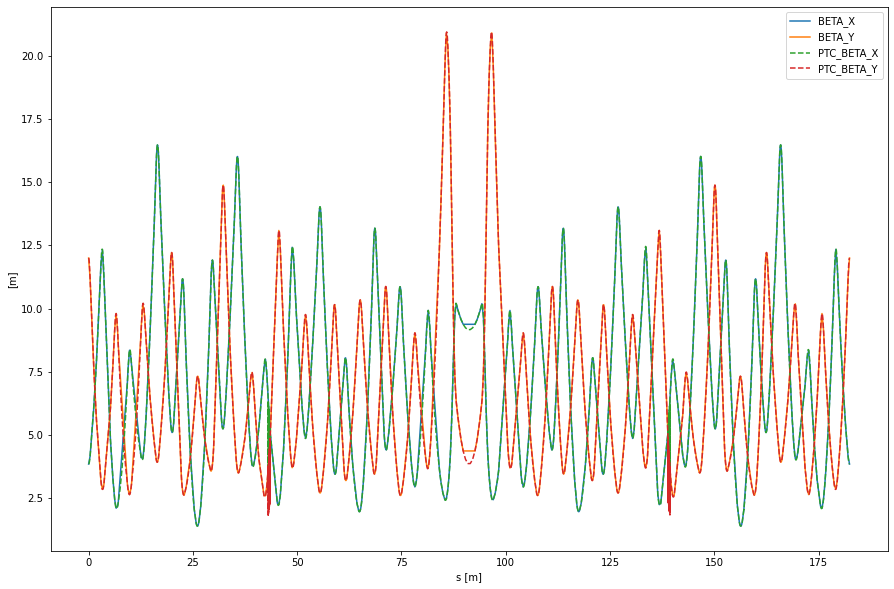

In [45]:
twiss = madx.table['twiss']
ptc_twiss = madx.table['ptc_twiss']

plt.figure(figsize=(15,10))
plt.plot(twiss['S'], twiss['BETX'])
plt.plot(twiss['S'], twiss['BETY'])
plt.plot(ptc_twiss['S'], ptc_twiss['BETA11'],'--')
plt.plot(ptc_twiss['S'], ptc_twiss['BETA22'],'--')
plt.legend(['BETA_X', 'BETA_Y', 'PTC_BETA_X', 'PTC_BETA_Y'])
plt.xlabel('s [m]')
plt.ylabel('[m]')